# Modelo definitivo Educación Continua GP

## Tabla de contenidos
    1. Carga librerías y base de datos
    2. Manejo de bases de datos
    3. Construcción modelo definitivo
    4. Plan piloto

## 1. Carga librerías y base de datos

In [1]:
%pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import datetime as dt
import unidecode
from pytrends.request import TrendReq
import math
from datetime import datetime
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

#plt.style.use('ggplot')

## 2. Manejo de bases de datos

### 2.1 Carga la fuente de datos

In [4]:
# se carga la fuente de datos
path = '/content/EstructuraBaseTest-gp.csv'
data = pd.read_csv(path, delimiter=';', encoding='utf-8')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Consectutivo_curso        116 non-null    object 
 1   Nombre                    116 non-null    object 
 2   Fecha_inicio              116 non-null    object 
 3   Fecha_creación            116 non-null    object 
 4   Curso_nuevo               116 non-null    object 
 5   Programa                  116 non-null    object 
 6   NumCursos                 116 non-null    int64  
 7   NumCursosFac              116 non-null    int64  
 8   Keywords                  116 non-null    object 
 9   Valor_por_hora            116 non-null    float64
 10  Categoría                 116 non-null    object 
 11  Facultad                  116 non-null    object 
 12  Modalidad                 116 non-null    object 
 13  Estado                    116 non-null    object 
 14  Valor_Tari

In [6]:
data


,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,...,Valor_Tarifa,Departamento,Estado.1,Punto_equilibrio,Meta,Cupomaximo,Inscritos,Cantidadinscritostotales,Exitoso,validaExitoso
0,CUR-0027485,Programa infantil y juvenil de formación music...,1/02/2020,1/12/2019,Si,Si,184,31,"cursos de musica, cursos de canto, interpretac...",41462.50,...,3317000.0,Música,Finalizado,84.0,100,150,68,68,0,0
1,CUR-0028159,Edición de textos en LaTeX,25/02/2020,1/12/2019,Si,No,184,8,"textos en latex, edicion de textos en ltex, cu...",58300.00,...,1166000.0,Ciencias,Finalizado,9.0,15,25,7,7,0,0
2,CUR-0028168,Artes escénicas de Japón,23/04/2020,1/02/2020,Si,No,132,36,"cultura japonesa, arte japones, pintura japonesa",56250.00,...,1350000.0,Historia del Arte,Finalizado,9.0,15,20,1,11,0,0
3,CUR-0028170,Cultura popular de Japón,10/09/2020,1/07/2020,Si,No,116,30,"cultura japonesa, arte japones, pintura japonesa",56250.00,...,1350000.0,Historia del Arte,Finalizado,11.0,15,20,3,13,0,0
4,CUR-0028172,Cerámica: técnica modelado,8/02/2020,1/12/2019,Si,No,184,31,"humanidades, facultad de humanidades, carreras...",51818.18,...,1710000.0,Arte,Finalizado,11.0,15,17,8,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,17/11/2021,1/09/2021,Si,No,283,14,"RSL, ensayos clínicos, MA, evidencia, RSL-MA, ...",107142.86,...,1500000.0,Medicina,Finalizado,7.0,15,19,18,18,1,1
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,19/11/2021,1/09/2021,No,No,283,23,"Bolsa, Inversiones, Economía, Riesgo de pérdida.",60625.00,...,970000.0,Economía,Finalizado,11.0,15,30,30,30,1,1
113,CUR-0037026,Democracia ambiental en América Latina,15/02/2022,1/12/2021,Si,No,276,16,"Democracia, democracia ambiental, América Latina",53846.15,...,1400000.0,Centro Interdisciplinario de Estudios sobre De...,Finalizado,50.0,50,58,58,58,1,1
114,CUR-0037045,Introducción al análisis de datos en Python,15/02/2022,1/12/2021,No,No,276,27,"Datos, Economía, Analítica, Operaciones Matemá...",71333.33,...,1498000.0,Economía,Finalizado,11.0,15,25,13,24,1,1


### 2.2 copia de los datos a un nuevo dataframe

In [7]:
data_modelo = pd.DataFrame(data.loc[:, ['Consectutivo_curso','Nombre','Fecha_inicio','Fecha_creación','Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords','Valor_por_hora','Categoría','Facultad','Modalidad','validaExitoso']])

In [8]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso
0,CUR-0027485,Programa infantil y juvenil de formación music...,1/02/2020,1/12/2019,Si,Si,184,31,"cursos de musica, cursos de canto, interpretac...",41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0
1,CUR-0028159,Edición de textos en LaTeX,25/02/2020,1/12/2019,Si,No,184,8,"textos en latex, edicion de textos en ltex, cu...",58300.00,Actualización Profesional,CIENCIAS,Presencial,0
2,CUR-0028168,Artes escénicas de Japón,23/04/2020,1/02/2020,Si,No,132,36,"cultura japonesa, arte japones, pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0
3,CUR-0028170,Cultura popular de Japón,10/09/2020,1/07/2020,Si,No,116,30,"cultura japonesa, arte japones, pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0
4,CUR-0028172,Cerámica: técnica modelado,8/02/2020,1/12/2019,Si,No,184,31,"humanidades, facultad de humanidades, carreras...",51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,17/11/2021,1/09/2021,Si,No,283,14,"RSL, ensayos clínicos, MA, evidencia, RSL-MA, ...",107142.86,Actualización Profesional,MEDICINA,Virtual,1
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,19/11/2021,1/09/2021,No,No,283,23,"Bolsa, Inversiones, Economía, Riesgo de pérdida.",60625.00,Actualización Profesional,ECONOMIA,Virtual,1
113,CUR-0037026,Democracia ambiental en América Latina,15/02/2022,1/12/2021,Si,No,276,16,"Democracia, democracia ambiental, América Latina",53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1
114,CUR-0037045,Introducción al análisis de datos en Python,15/02/2022,1/12/2021,No,No,276,27,"Datos, Economía, Analítica, Operaciones Matemá...",71333.33,Actualización Profesional,ECONOMIA,Virtual,1


### 2.3 trasnfromacion de variables y manejo de null

In [9]:
# # Transformaciones a variables de la base 
data_modelo['Curso_nuevo'] = data_modelo['Curso_nuevo'].replace({'Si':1, 'No':0})
data_modelo['Programa'] = data_modelo['Programa'].replace({'Si':1, 'No':0})

In [10]:
# Transformar formato de las fechas  
data_modelo['Fecha_creación'] =  pd.to_datetime(data_modelo['Fecha_creación'], format='%d/%m/%Y')
data_modelo['Fecha_inicio']   =  pd.to_datetime(data_modelo['Fecha_inicio']  , format='%d/%m/%Y')

In [11]:
#Agregar ventanas de tiempo
data_modelo['Fecha_busqueda'] =  data_modelo['Fecha_creación'] + pd.Timedelta('-1 days')
data_modelo['Fecha_ventana']  =  data_modelo['Fecha_creación'] + pd.Timedelta('-180 days')


In [12]:
# Variables a imputar con media

In [13]:
data_modelo['Valor_por_hora'].mean()

56219.08844827587

In [14]:
data_modelo['Valor_por_hora']=data_modelo['Valor_por_hora'].fillna(data_modelo['Valor_por_hora'].mean())

In [15]:
data_modelo['Keywords']=data_modelo['Keywords'].fillna('n/a')

In [16]:
#Separación de keywords
#data_modelo = data_modelo.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
#data_modelo = data_modelo.withColumn('Keywords', F.split(F.col('Keywords'), ','))
#data_modelo = data_modelo.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [17]:
import re
# meta lenguaje 

In [18]:
print (data_modelo.iloc[2])

Consectutivo_curso                                         CUR-0028168
Nombre                                        Artes escénicas de Japón
Fecha_inicio                                       2020-04-23 00:00:00
Fecha_creación                                     2020-02-01 00:00:00
Curso_nuevo                                                          1
Programa                                                             0
NumCursos                                                          132
NumCursosFac                                                        36
Keywords              cultura japonesa, arte japones, pintura japonesa
Valor_por_hora                                                 56250.0
Categoría                                Artes, Ciencias y Humanidades
Facultad                                           ARTES Y HUMANIDADES
Modalidad                                                      Virtual
validaExitoso                                                        0
Fecha_

In [19]:
print (data_modelo.Consectutivo_curso.iloc[2])

CUR-0028168


In [20]:
print (data_modelo.Keywords.iloc[2])

cultura japonesa, arte japones, pintura japonesa


In [21]:
data_modelo.Keywords =   data_modelo.Keywords.str.replace(r',\s', ',', regex=True )


In [22]:
print (data_modelo.Keywords.iloc[2])

cultura japonesa,arte japones,pintura japonesa


In [23]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
data_modelo[['Curso_nuevo', 'Programa', 'Categoría', 'Facultad', 'Modalidad']] = data_modelo[['Curso_nuevo', 'Programa', 'Categoría', 'Facultad', 'Modalidad']].astype('category') 

In [24]:
data_modelo

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana
0,CUR-0027485,Programa infantil y juvenil de formación music...,2020-02-01,2019-12-01,1,1,184,31,"cursos de musica,cursos de canto,interpretació...",41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04
1,CUR-0028159,Edición de textos en LaTeX,2020-02-25,2019-12-01,1,0,184,8,"textos en latex,edicion de textos en ltex,curs...",58300.00,Actualización Profesional,CIENCIAS,Presencial,0,2019-11-30,2019-06-04
2,CUR-0028168,Artes escénicas de Japón,2020-04-23,2020-02-01,1,0,132,36,"cultura japonesa,arte japones,pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-01-31,2019-08-05
3,CUR-0028170,Cultura popular de Japón,2020-09-10,2020-07-01,1,0,116,30,"cultura japonesa,arte japones,pintura japonesa",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-06-30,2020-01-03
4,CUR-0028172,Cerámica: técnica modelado,2020-02-08,2019-12-01,1,0,184,31,"humanidades,facultad de humanidades,carreras d...",51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,2021-11-17,2021-09-01,1,0,283,14,"RSL,ensayos clínicos,MA,evidencia,RSL-MA,enfoq...",107142.86,Actualización Profesional,MEDICINA,Virtual,1,2021-08-31,2021-03-05
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,2021-11-19,2021-09-01,0,0,283,23,"Bolsa,Inversiones,Economía,Riesgo de pérdida.",60625.00,Actualización Profesional,ECONOMIA,Virtual,1,2021-08-31,2021-03-05
113,CUR-0037026,Democracia ambiental en América Latina,2022-02-15,2021-12-01,1,0,276,16,"Democracia,democracia ambiental,América Latina",53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1,2021-11-30,2021-06-04
114,CUR-0037045,Introducción al análisis de datos en Python,2022-02-15,2021-12-01,0,0,276,27,"Datos,Economía,Analítica,Operaciones Matemátic...",71333.33,Actualización Profesional,ECONOMIA,Virtual,1,2021-11-30,2021-06-04


In [25]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Consectutivo_curso  116 non-null    object        
 1   Nombre              116 non-null    object        
 2   Fecha_inicio        116 non-null    datetime64[ns]
 3   Fecha_creación      116 non-null    datetime64[ns]
 4   Curso_nuevo         116 non-null    category      
 5   Programa            116 non-null    category      
 6   NumCursos           116 non-null    int64         
 7   NumCursosFac        116 non-null    int64         
 8   Keywords            116 non-null    object        
 9   Valor_por_hora      116 non-null    float64       
 10  Categoría           116 non-null    category      
 11  Facultad            116 non-null    category      
 12  Modalidad           116 non-null    category      
 13  validaExitoso       116 non-null    int64         

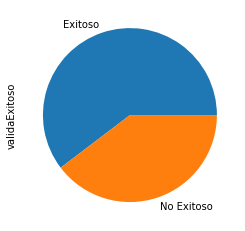

In [26]:
# visaulizamos  el % de cuross exitos y no exitos 
data_modelo['validaExitoso'].value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'}).plot.pie()

In [27]:
# imprimme  el % de cuross exitos y no exitos 
data.validaExitoso.value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'})

Exitoso       0.603448
No Exitoso    0.396552
Name: validaExitoso, dtype: float64

In [28]:
import seaborn as sns # Libraría interesante para hacer visualizaciones

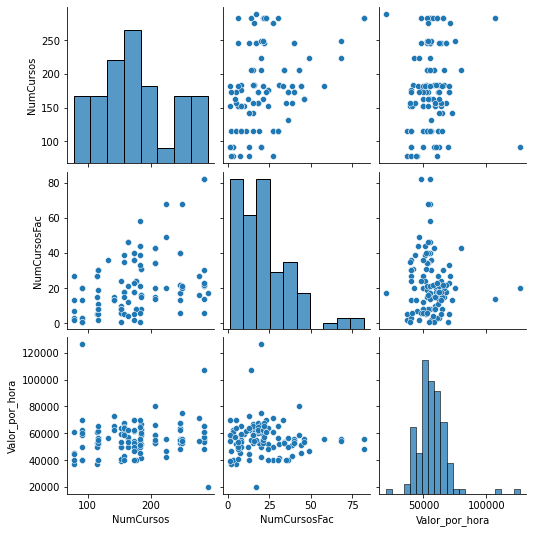

In [29]:
# visualizamos la correlación de las variables tipo numerico 
sns.pairplot(data_modelo.loc[:, ['NumCursos','NumCursosFac','Valor_por_hora']])

## 3 funcion  Google Trends

In [30]:
#Completar información con pytrens - Google Trends
def get_google_trend(keywords, start_date, end_date):
  start_date_str = start_date.strftime('%Y-%m-%d')
  end_date_str = end_date.strftime('%Y-%m-%d')
  keywords_list = list(keywords)
  keywords_list = [kw.lower().strip().replace(r'[^\w\s]', '') for kw in keywords_list]
  print(keywords_list)
  df = None
  max_tol = 30
  init_tol = 1
  pytrend = TrendReq(hl='su', tz=360, geo='CO')
  try:
    pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
    df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
  except:
    request_success = False
    while (not request_success) and (init_tol < max_tol):
      time.sleep(1+round(random.random(), 2))
      try:
        pytrend.build_payload(keywords_list[:5], timeframe=f'{start_date_str} {end_date_str}', cat=958)
        df = pytrend.interest_over_time().drop(['isPartial'],axis=1)
        request_success = True
      except:
        request_success = False
        init_tol = init_tol + 1
  if df is None:
    return 0
  means = df.mean()
  return round(float(means.mean()), 2)



### 3.1 Busqueda kerword

In [31]:
%pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#Importar utilidades de pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.shell import spark
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.sql.types import IntegerType,BooleanType,DateType

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.1
      /_/

Using Python version 3.8.16 (default, Dec  7 2022 01:12:13)
Spark context Web UI available at http://27d821df18d5:4040
Spark context available as 'sc' (master = local[*], app id = local-1671723577406).
SparkSession available as 'spark'.


In [33]:
#Limpieza cache spark
spark.catalog.clearCache()

In [34]:
data_modelo_df = spark.createDataFrame(data_modelo)

In [35]:
#Separación de keywords
data_modelo_df = data_modelo_df.withColumn('Keywords', F.regexp_replace(F.col('Keywords'), r',\s', ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.split(F.col('Keywords'), ','))
data_modelo_df = data_modelo_df.withColumn('Keywords', F.array_remove(F.col('Keywords'), ''))

In [36]:
df_rows = data_modelo_df.collect()

In [37]:
#df_rows

In [38]:
data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.lit(0))
for row in df_rows:
  keywords = get_google_trend(row['Keywords'], row['Fecha_busqueda'], row['Fecha_creación'])
  data_modelo_df = data_modelo_df.withColumn('Keywords_gt', F.when(F.col('Consectutivo_curso') == row['Consectutivo_curso'], keywords).otherwise(F.col('Keywords_gt')))


['cursos de musica', 'cursos de canto', 'interpretación de instrumentos']
['textos en latex', 'edicion de textos en ltex', 'cursos de ciencias']
['cultura japonesa', 'arte japones', 'pintura japonesa']
['cultura japonesa', 'arte japones', 'pintura japonesa']
['humanidades', 'facultad de humanidades', 'carreras de humanidades']
['cursos de derecho', 'programa de derecho', 'diplomados en derecho']
['cursos para docentes', 'pedagogia', 'cursos de pedagogia']
['terapia mindfulness', 'mindfulness', 'mindfulness y psicologia']
['economía japonesa', 'economía de oriente', 'negocios japón']
['que es manejo de conflictos interpersonales', 'tecnicas para el manejo de conflictos interpersonales', 'manejo de conflictos interpersonales']
['inteligencia artificial', 'que inteligencia artificial', 'inteligencia artificial ejemplos']
['curso de python', 'big data en python', 'curso análisis de datos']
['cursos de derecho', 'programa de derecho', 'diplomados en derecho']
['administracion de proyectos',

In [39]:
display(data_modelo_df)

DataFrame[Consectutivo_curso: string, Nombre: string, Fecha_inicio: timestamp, Fecha_creación: timestamp, Curso_nuevo: bigint, Programa: bigint, NumCursos: bigint, NumCursosFac: bigint, Keywords: array<string>, Valor_por_hora: double, Categoría: string, Facultad: string, Modalidad: string, validaExitoso: bigint, Fecha_busqueda: timestamp, Fecha_ventana: timestamp, Keywords_gt: int]

In [40]:
data_modelo_df = data_modelo_df.toPandas()


In [41]:
data_modelo_df.to_csv('/content/data_modelo_df.csv', sep=';', index=False)

In [42]:
data_modelo_df

,Consectutivo_curso,Nombre,Fecha_inicio,Fecha_creación,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords,Valor_por_hora,Categoría,Facultad,Modalidad,validaExitoso,Fecha_busqueda,Fecha_ventana,Keywords_gt
0,CUR-0027485,Programa infantil y juvenil de formación music...,2020-02-01,2019-12-01,1,1,184,31,"[cursos de musica, cursos de canto, interpreta...",41462.50,Niños y Jóvenes,ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04,0
1,CUR-0028159,Edición de textos en LaTeX,2020-02-25,2019-12-01,1,0,184,8,"[textos en latex, edicion de textos en ltex, c...",58300.00,Actualización Profesional,CIENCIAS,Presencial,0,2019-11-30,2019-06-04,0
2,CUR-0028168,Artes escénicas de Japón,2020-04-23,2020-02-01,1,0,132,36,"[cultura japonesa, arte japones, pintura japon...",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-01-31,2019-08-05,0
3,CUR-0028170,Cultura popular de Japón,2020-09-10,2020-07-01,1,0,116,30,"[cultura japonesa, arte japones, pintura japon...",56250.00,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Virtual,0,2020-06-30,2020-01-03,0
4,CUR-0028172,Cerámica: técnica modelado,2020-02-08,2019-12-01,1,0,184,31,"[humanidades, facultad de humanidades, carrera...",51818.18,"Artes, Ciencias y Humanidades",ARTES Y HUMANIDADES,Presencial,0,2019-11-30,2019-06-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,CUR-0037008,Evaluación de la calidad de la evidencia con l...,2021-11-17,2021-09-01,1,0,283,14,"[RSL, ensayos clínicos, MA, evidencia, RSL-MA,...",107142.86,Actualización Profesional,MEDICINA,Virtual,1,2021-08-31,2021-03-05,0
112,CUR-0037014,¿Cómo invertir en bolsa reduciendo el riesgo d...,2021-11-19,2021-09-01,0,0,283,23,"[Bolsa, Inversiones, Economía, Riesgo de pérdi...",60625.00,Actualización Profesional,ECONOMIA,Virtual,1,2021-08-31,2021-03-05,0
113,CUR-0037026,Democracia ambiental en América Latina,2022-02-15,2021-12-01,1,0,276,16,"[Democracia, democracia ambiental, América Lat...",53846.15,Actualización Profesional,CENTRO INTERDISCIPLINARIO DE ESTUDIOS SOBRE DE...,Virtual,1,2021-11-30,2021-06-04,0
114,CUR-0037045,Introducción al análisis de datos en Python,2022-02-15,2021-12-01,0,0,276,27,"[Datos, Economía, Analítica, Operaciones Matem...",71333.33,Actualización Profesional,ECONOMIA,Virtual,1,2021-11-30,2021-06-04,0


## 4 Construcción modelo definitivo

## 4.1 copia dataframe para seleccionar columnas predicción

In [43]:
data_modelo_df_p = pd.DataFrame(data_modelo_df.loc[:, ['Curso_nuevo','Programa','NumCursos','NumCursosFac','Keywords_gt','Valor_por_hora','validaExitoso']])

In [44]:
data_modelo_df_p

,Curso_nuevo,Programa,NumCursos,NumCursosFac,Keywords_gt,Valor_por_hora,validaExitoso
0,1,1,184,31,0,41462.50,0
1,1,0,184,8,0,58300.00,0
2,1,0,132,36,0,56250.00,0
3,1,0,116,30,0,56250.00,0
4,1,0,184,31,0,51818.18,0
...,...,...,...,...,...,...,...
111,1,0,283,14,0,107142.86,1
112,0,0,283,23,0,60625.00,1
113,1,0,276,16,0,53846.15,1
114,0,0,276,27,0,71333.33,1


In [45]:
data_modelo_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Curso_nuevo     116 non-null    int64  
 1   Programa        116 non-null    int64  
 2   NumCursos       116 non-null    int64  
 3   NumCursosFac    116 non-null    int64  
 4   Keywords_gt     116 non-null    int32  
 5   Valor_por_hora  116 non-null    float64
 6   validaExitoso   116 non-null    int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 6.0 KB


In [46]:
# Variables categóricas: convertimos las variables categoricas del base de datos 
#data_modelo_df_p[[ 'Categoría', 'Facultad', 'Modalidad']] = data_modelo[['Categoría', 'Facultad', 'Modalidad']].astype('category') 

### 4.2. Dividir la muestra en train y test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Necesitamos separar la muestra en entrenamiento y testeo
# La función train_test_split retorna 4 outputs
x_train, x_test, y_train, y_test = train_test_split(
    data_modelo_df_p.drop(columns=['validaExitoso']),
    data_modelo_df_p.validaExitoso,
    test_size=.3,
    random_state=123
)

In [49]:
y_train.value_counts(True)

1    0.62963
0    0.37037
Name: validaExitoso, dtype: float64

In [50]:
data_modelo_df_p.validaExitoso.value_counts(True).rename({0: 'No Exitoso', 1: 'Exitoso'})

Exitoso       0.603448
No Exitoso    0.396552
Name: validaExitoso, dtype: float64

In [51]:
x_train.to_csv('/content/x_train.csv', sep=';', index=False)

In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 72 to 109
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Curso_nuevo     81 non-null     int64  
 1   Programa        81 non-null     int64  
 2   NumCursos       81 non-null     int64  
 3   NumCursosFac    81 non-null     int64  
 4   Keywords_gt     81 non-null     int32  
 5   Valor_por_hora  81 non-null     float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 4.1 KB


In [53]:
y_train

72     1
113    1
21     1
54     0
77     1
      ..
102    0
98     0
92     1
66     0
109    0
Name: validaExitoso, Length: 81, dtype: int64

#### Hiperparámetros

- Número de árboles
- Máximo número de variables

In [54]:
from sklearn.ensemble import RandomForestClassifier # Importo la función para estimar RandomForest
#from sklearn.ensemble import RandomForestRegressor

###  Al momento de ajustar el modelo, debemos tener en cuenta los siguientes hiperparámetros. 

- n_estimators: será la cantidad de árboles que generaremos.
- max_features: la manera de seleccionar la cantidad máxima de features para cada árbol.
- min_sample_leaf: número mínimo de elementos en las hojas para permitir un nuevo split (división) del nodo.
- oob_score: es un método que emula el cross-validation en árboles y permite - mejorar la precisión y evitar overfitting.
- boostrap: para utilizar diversos tamaños de muestras para entrenar. Si se pone en falso, utilizará siempre el dataset completo.
- n_jobs: si tienes multiples cores en tu CPU, puedes indicar cuantos puede usar el modelo al entrenar para acelerar el entrenamiento.

In [55]:
# Defino el RandomForest
# Creación del modelo
# ==============================================================================
modelo  =  RandomForestClassifier(
                max_depth=6,  
                n_estimators=10,  
                random_state=2022
                )

In [56]:
# Estimo el modelo para Train
modelo.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=2022)

In [57]:
modelo.score(x_train, y_train)

0.9259259259259259

In [58]:
predictions_x_train = modelo.predict_proba(x_train)

In [59]:
predictions_x_train

array([[0.08222222, 0.91777778],
       [0.02222222, 0.97777778],
       [0.1       , 0.9       ],
       [1.        , 0.        ],
       [0.07579365, 0.92420635],
       [0.8       , 0.2       ],
       [0.13579365, 0.86420635],
       [0.08888889, 0.91111111],
       [0.02222222, 0.97777778],
       [0.31357143, 0.68642857],
       [0.6       , 0.4       ],
       [0.3       , 0.7       ],
       [0.07579365, 0.92420635],
       [0.06666667, 0.93333333],
       [0.085     , 0.915     ],
       [0.1       , 0.9       ],
       [0.1       , 0.9       ],
       [0.51666667, 0.48333333],
       [0.6       , 0.4       ],
       [0.43579365, 0.56420635],
       [1.        , 0.        ],
       [0.04722222, 0.95277778],
       [0.9       , 0.1       ],
       [0.86666667, 0.13333333],
       [0.4       , 0.6       ],
       [0.425     , 0.575     ],
       [0.13579365, 0.86420635],
       [0.08888889, 0.91111111],
       [0.49579365, 0.50420635],
       [0.51666667, 0.48333333],
       [0.

In [60]:
pd.crosstab(y_train, modelo.predict(x_train))

col_0,0,1
validaExitoso,,
0,26,4
1,2,49


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
print("accuracy: {:.4f}".format(accuracy_score(y_train,modelo.predict(x_train))))
print("precision: {:.4f}".format(precision_score(y_train,modelo.predict(x_train))))
print("recall: {:.4f}".format(recall_score(y_train,modelo.predict(x_train))))
print("f1: {:.4f}".format(f1_score(y_train,modelo.predict(x_train))))


accuracy: 0.9259
precision: 0.9245
recall: 0.9608
f1: 0.9423


In [62]:
# Estudiamos la importancia train de las variables en el RandomForest
importancia_rf_train=pd.DataFrame(modelo.feature_importances_, index=x_train.columns, columns=['Importancia'])
importancia_rf_train

,Importancia
Curso_nuevo,0.039661
Programa,0.000000
NumCursos,0.295189
NumCursosFac,0.342314
Keywords_gt,0.000000
Valor_por_hora,0.322836


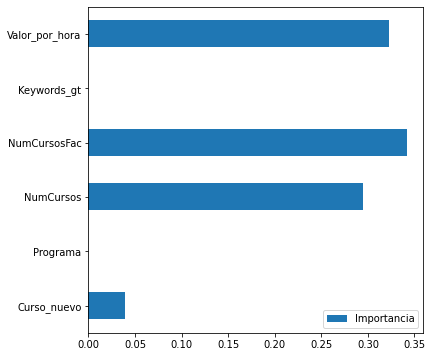

In [63]:
# Visualización de la importancia train
importancia_rf_train.plot(kind='barh', figsize=(6,6))

In [64]:
# Estimo el modelo para Test
modelo.fit(x_test, y_test)


RandomForestClassifier(max_depth=6, n_estimators=10, random_state=2022)

In [65]:
modelo.score(x_test, y_test)

1.0

In [73]:
predictions_x_test = modelo.predict_proba(x_test)

In [74]:
predictions_x_test

array([[0.8       , 0.2       ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.2       , 0.8       ],
       [1.        , 0.        ],
       [0.3       , 0.7       ],
       [0.24761905, 0.75238095],
       [1.        , 0.        ],
       [0.3       , 0.7       ],
       [0.9       , 0.1       ],
       [0.48095238, 0.51904762],
       [1.        , 0.        ],
       [0.68095238, 0.31904762],
       [0.7       , 0.3       ],
       [0.01428571, 0.98571429],
       [0.2       , 0.8       ],
       [0.9       , 0.1       ],
       [0.31428571, 0.68571429],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [0.2       , 0.8       ],
       [0.9       , 0.1       ],
       [0.14761905, 0.85238095],
       [0.3       , 0.7       ],
       [0.14761905, 0.85238095],
       [0.8       , 0.2       ],
       [0.9       , 0.1       ],
       [0.7       , 0.3       ],
       [0.4       , 0.6       ],
       [0.

In [68]:
pd.crosstab(y_test, modelo.predict(x_test))

col_0,0,1
validaExitoso,,
0,16,0
1,0,19


In [72]:
print("accuracy: {:.4f}".format(accuracy_score(y_test,modelo.predict(x_test))))
print("precision: {:.4f}".format(precision_score(y_test,modelo.predict(x_test))))
print("recall: {:.4f}".format(recall_score(y_test,modelo.predict(x_test))))
print("f1: {:.4f}".format(f1_score(y_test,modelo.predict(x_test))))


accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000


In [70]:
# Estudiamos la importancia de las variables _test en el RandomForest
importancia_rf_test=pd.DataFrame(modelo.feature_importances_, index=x_test.columns, columns=['Importancia'])
importancia_rf_test

,Importancia
Curso_nuevo,0.060658
Programa,0.012576
NumCursos,0.377747
NumCursosFac,0.276766
Keywords_gt,0.000000
Valor_por_hora,0.272252


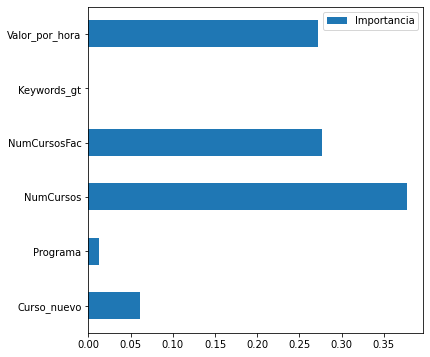

In [71]:
# Visualización de la importancia _test
importancia_rf_test.plot(kind='barh', figsize=(6,6))

### 4.3 cargar nuvo archivo con cursos a predecir 

## 5 Grid search


###  Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros. Puede encontrarse más información sobre las estrategias de búsqueda en Machine learning con Python y Scikit-learn.

### 5.1 Grid Search basado en out-of-bag error

In [75]:
from sklearn.model_selection import ParameterGrid

### El valor de máx_features es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.

In [112]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [10],
                 'max_features': ['auto'],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    


    modelo2 = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo2.fit(x_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo2.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
#resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10} ✓
Modelo: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 10} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,params,oob_r2,max_depth,max_features,n_estimators
1,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",0.617284,3.0,auto,10
0,"{'max_depth': None, 'max_features': 'auto', 'n...",0.580247,NaN,auto,10
2,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.580247,10.0,auto,10
3,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.580247,20.0,auto,10


In [80]:
import multiprocessing

In [125]:
# VERSIÓN PARALELIZADA
# ==============================================================================

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [10, 20, 50],
                 'max_features': [ 5, 6],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 123,
        ** params            
    )
    # 
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_r2': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(x_train, y_train, RandomForestClassifier(), params) for params in param_grid]
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 20} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': None, 'max_features': 6, 'n_estimators': 10} ✓
Modelo: {'max_depth': None, 'max_features': 6, 'n_estimators': 20} ✓
Modelo: {'max_depth': None, 'max_features': 6, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 20} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': 3, 'max_features': 6, 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 6, 'n_estimators': 20} ✓
Modelo: {'max_depth': 3, 'max_features': 6, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': 10, 'max_features': 6, 'n_estimators': 10} ✓
Modelo: {'max_depth': 10, 'max_features': 6, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'max_features': 6, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 50} ✓


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Modelo: {'max_depth': 20, 'max_features': 6, 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 6, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'max_features': 6, 'n_estimators': 50} ✓


,oob_r2,max_depth,max_features,n_estimators
8,0.679012,3.0,5.0,50.0
7,0.666667,3.0,5.0,20.0
11,0.654321,3.0,6.0,50.0
3,0.654321,NaN,6.0,10.0


In [126]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_r2'], "R2")

resultados

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
0.6790123456790124 : 0.6790123456790124 R2


,oob_r2,max_depth,max_features,n_estimators
8,0.679012,3.0,5.0,50.0
7,0.666667,3.0,5.0,20.0
11,0.654321,3.0,6.0,50.0
3,0.654321,NaN,6.0,10.0
21,0.654321,20.0,6.0,10.0
15,0.654321,10.0,6.0,10.0
10,0.641975,3.0,6.0,20.0
0,0.629630,NaN,5.0,10.0
22,0.629630,20.0,6.0,20.0
18,0.629630,20.0,5.0,10.0


In [119]:
# Defino el RandomForest
# Creación del modelo
# ==============================================================================
modelo2  =  RandomForestClassifier(
                max_depth=3,  
                n_estimators=50,  
                random_state=2022
                )

In [120]:
# Estimo el modelo para Train
modelo2.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2022)

In [121]:
modelo2.score(x_train, y_train)

0.7777777777777778

In [122]:
pd.crosstab(y_train, modelo2.predict(x_train))

col_0,0,1
validaExitoso,,
0,15,15
1,3,48


In [123]:
print("accuracy: {:.4f}".format(accuracy_score(y_train,modelo2.predict(x_train))))
print("precision: {:.4f}".format(precision_score(y_train,modelo2.predict(x_train))))
print("recall: {:.4f}".format(recall_score(y_train,modelo2.predict(x_train))))
print("f1: {:.4f}".format(f1_score(y_train,modelo2.predict(x_train))))

accuracy: 0.7778
precision: 0.7619
recall: 0.9412
f1: 0.8421
